In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

In [3]:
import numpy as np


In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


In [5]:
import itertools
marker = itertools.cycle(('s', 'd', '^', 'o', '*')) 
color =  itertools.cycle(('red', 'blue', 'green', 'magenta', 'black', 'orange', 'turquoise'))

In [6]:
from scipy.stats import shapiro, mannwhitneyu, fligner, ttest_ind

In [7]:
from scipy.stats import probplot

______

Источник: https://github.com/fivethirtyeight/data/tree/master/births

Исследуемые ниже данные о ежедневной рождаемости в США в 1994-2003 годах предоставлены Центром по контролю и профилактике заболеваний США





In [8]:
data = pd.read_csv('US1994-2003.csv')

In [9]:
years = data.year.unique()
months = data.month.unique()
nmonths = ['Янв', "Февр", "Март", "Апр", "Май", "Июнь", "Июль", "Авг", "Сент", "Окт", "Нояб", "Дек"]
days = data.date_of_month.unique()
dofweek = data.day_of_week.unique()
ndofweek = ['sat', 'sun', 'mon', 'tue','wed','thu','fri']

In [10]:
def myplot(day = days, weekday = dofweek):
    d = data.date_of_month.isin(day)
    wd = data.day_of_week.isin(weekday)
    plt.plot(data[d & wd].births, marker = next(marker), color = next(color), linestyle = '')
    d1 = data[(data.date_of_month == 1) & (data.month == 1)]
    xticks(d1.index, d1.year)
    

In [11]:
def dta(data = data,year = years, month = months, day = days, weekday = dofweek):
    y = data.year.isin(year)
    m = data.month.isin(month)
    d = data.date_of_month.isin(day)
    wd = data.day_of_week.isin(weekday)
    return data[y & m & d & wd]

Визуальный анализ:

In [12]:
data.head(20)

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
5,1994,1,6,4,11406
6,1994,1,7,5,11251
7,1994,1,8,6,8653
8,1994,1,9,7,7910
9,1994,1,10,1,10498


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
year             3652 non-null int64
month            3652 non-null int64
date_of_month    3652 non-null int64
day_of_week      3652 non-null int64
births           3652 non-null int64
dtypes: int64(5)
memory usage: 142.7 KB


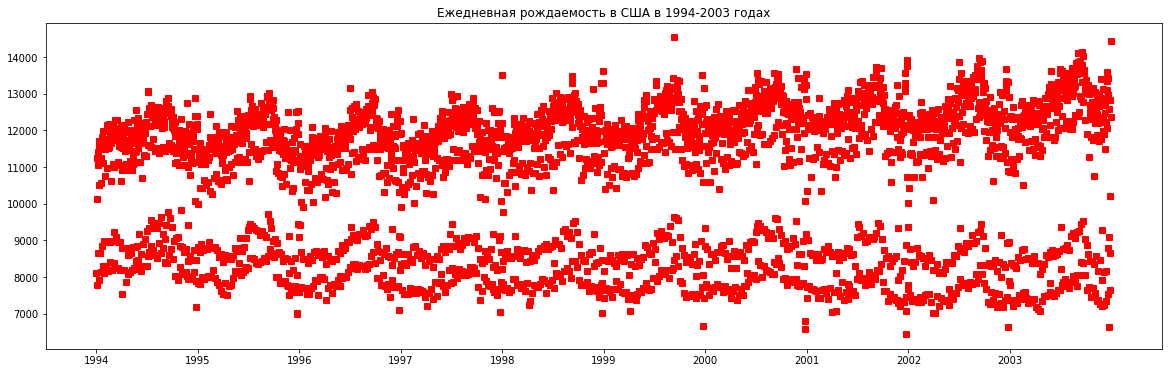

In [14]:
myplot()
title("Ежедневная рождаемость в США в 1994-2003 годах")
plt.show()

Данные образуют две непересекающие группы , похожие на зубья пилы. Причина -  недельная и годовая сезонности.


In [15]:
d2 = dta(year = [2000], month = months[6:])

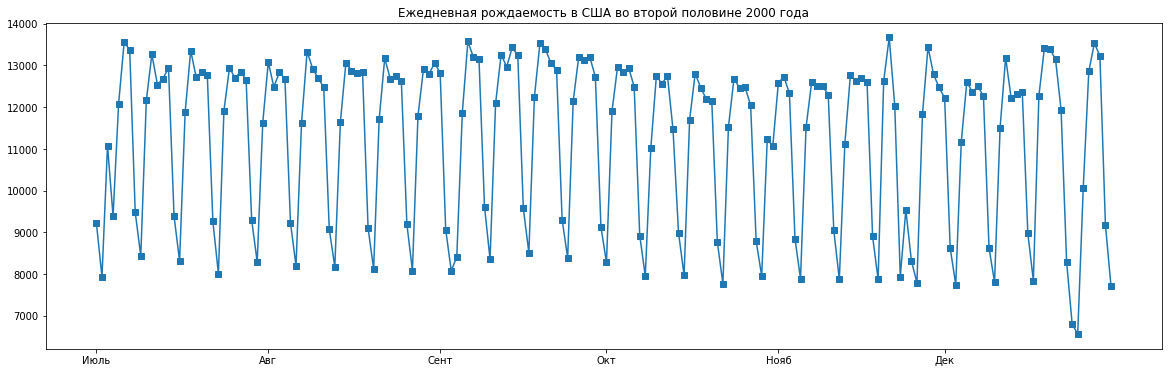

In [17]:
plt.plot(d2.births, marker = 's')
xticks(d2[d2.date_of_month == 1].index, nmonths[6:] )
title("Ежедневная рождаемость в США во второй половине 2000 года")
plt.show()

In [18]:
d3 = dta(year = [1994, 1995])

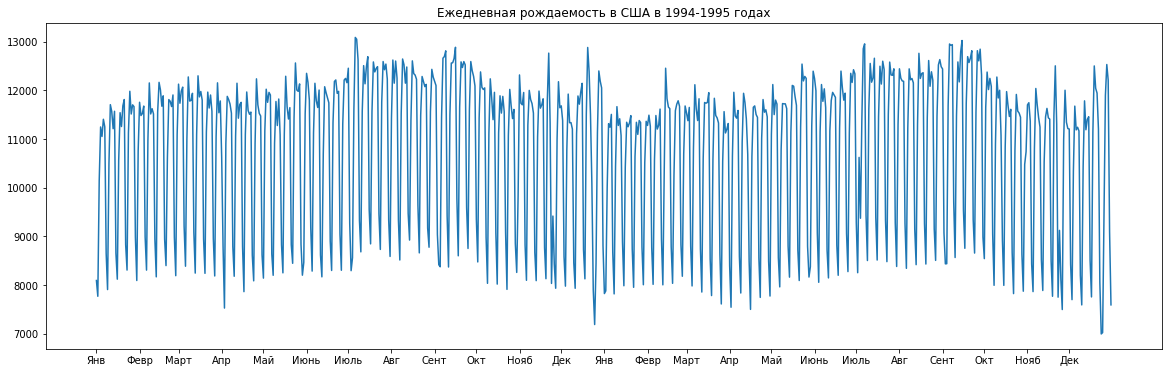

In [19]:
plt.plot(d3.births)
xticks(d3[d3.date_of_month == 1].index, nmonths*2 )
title("Ежедневная рождаемость в США в 1994-1995 годах")
plt.show()

Годовая сезонность заметнее на недельном графике рождаемости

In [20]:
num_of_weeks = int(len(data)/7)

In [21]:
num_of_weeks_year = int(365/7)

In [22]:
per_week = np.array([sum(data.births[7*i:7*(i+1)]) for i in range(0,num_of_weeks)])

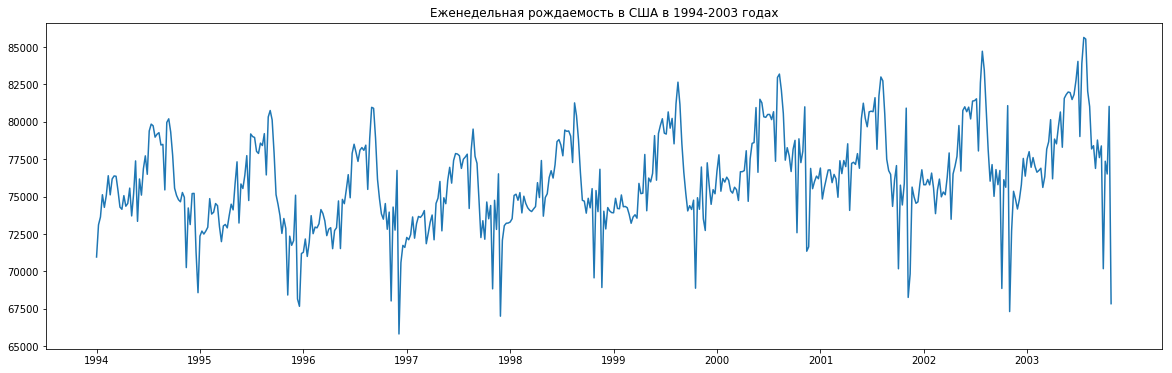

In [24]:
plt.plot(per_week)
xticks(range(0, num_of_weeks, num_of_weeks_year), years )
title("Еженедельная рождаемость в США в 1994-2003 годах")
plt.show()

Годовая сезонность на графике автокорреляции

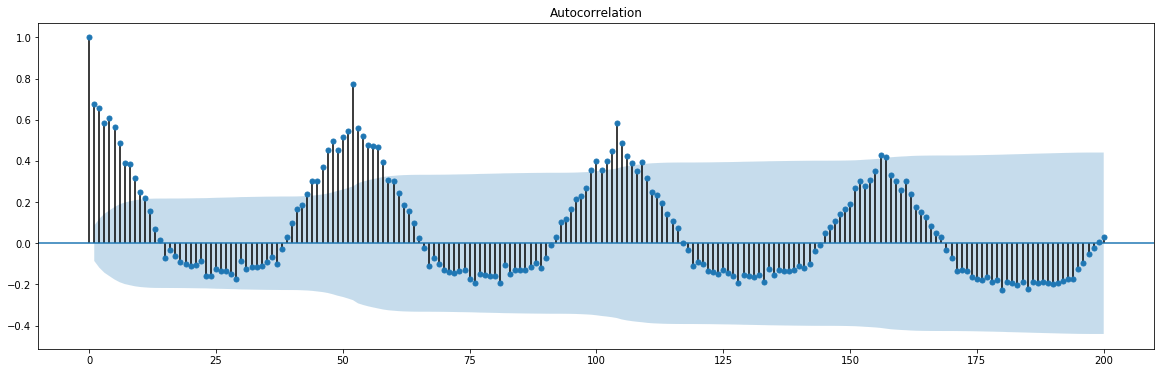

In [25]:
plot_acf(per_week, lags = 200)
plt.show()

Недельная сезонность на графике автокорреляции

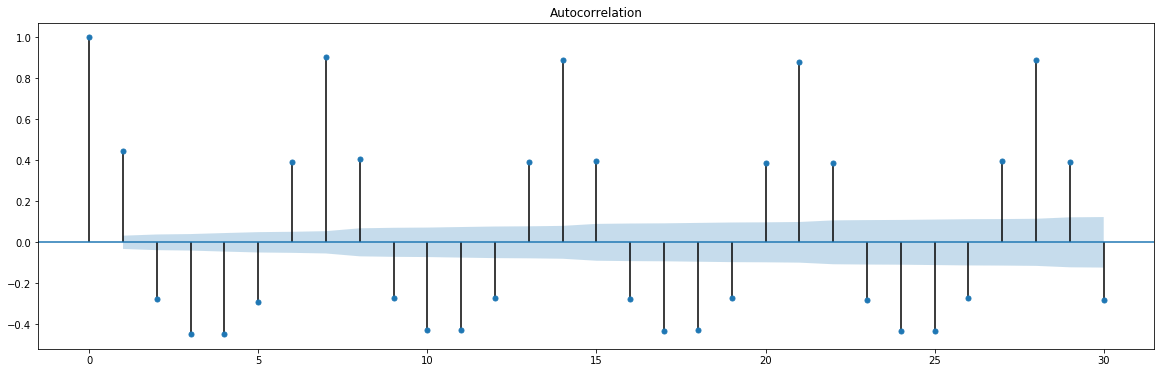

In [26]:
plot_acf(data.births, lags = 30)
plt.show()

______

Распределение рождаемости по дню недели

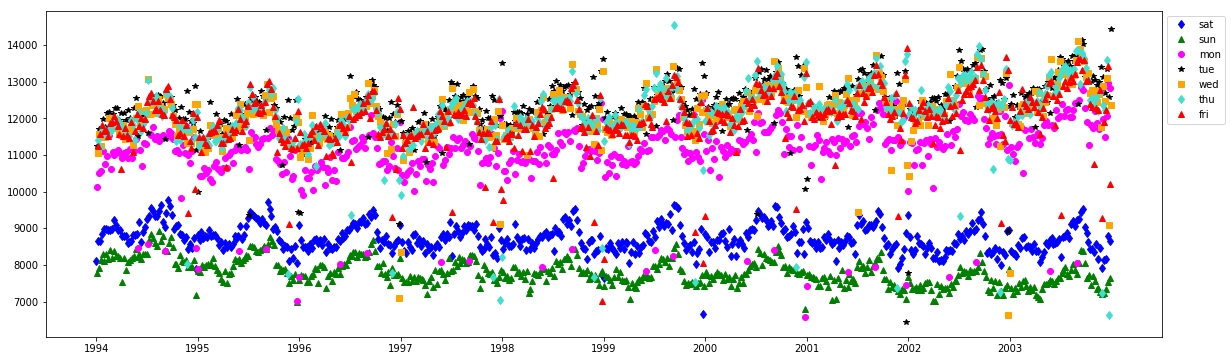

In [27]:
for i in dofweek:
    myplot(weekday = [i])
plt.legend(ndofweek, bbox_to_anchor = (1,1))

Среди будних дней встречаются дни с низкой как в выходные рождаемостью (выбросы). Посмотрим что за дни

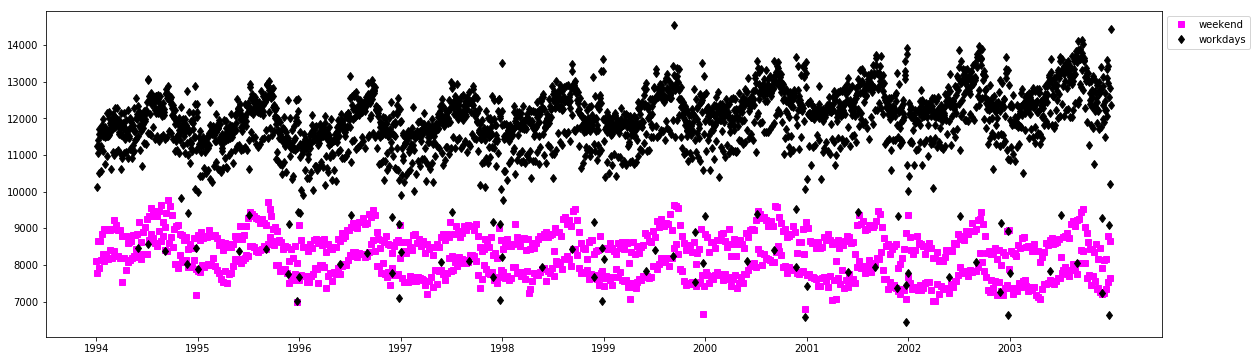

In [31]:
myplot(weekday = [6,7])
myplot(weekday = range(1,6))
plt.legend(['weekend','workdays'], bbox_to_anchor = (1,1))
plt.show()

In [32]:
workdays = dta(weekday = range(1,6))

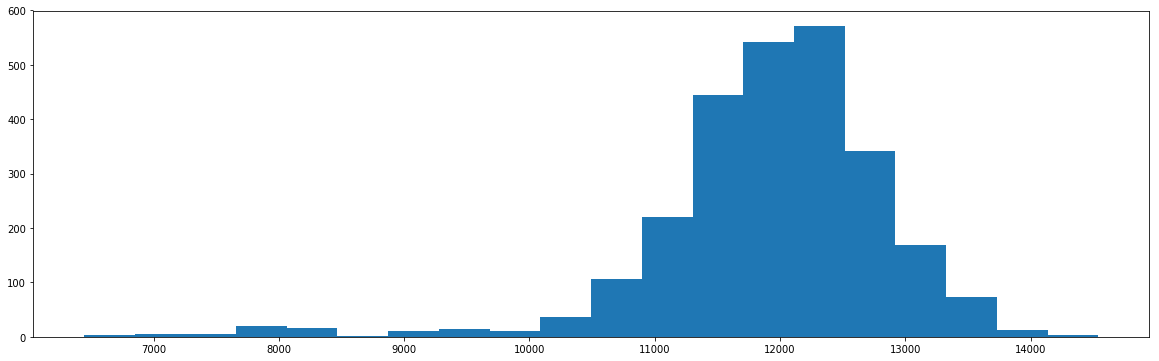

In [33]:
plt.hist(workdays.births, 20)
plt.show()

Из гистограммы отсечем выбросы

In [34]:
fltr = (workdays.births < 9900)|(workdays.births > 14300)

In [35]:
outl = np.array(workdays.births[fltr])

In [36]:
idx = np.array(workdays.births[fltr].index)

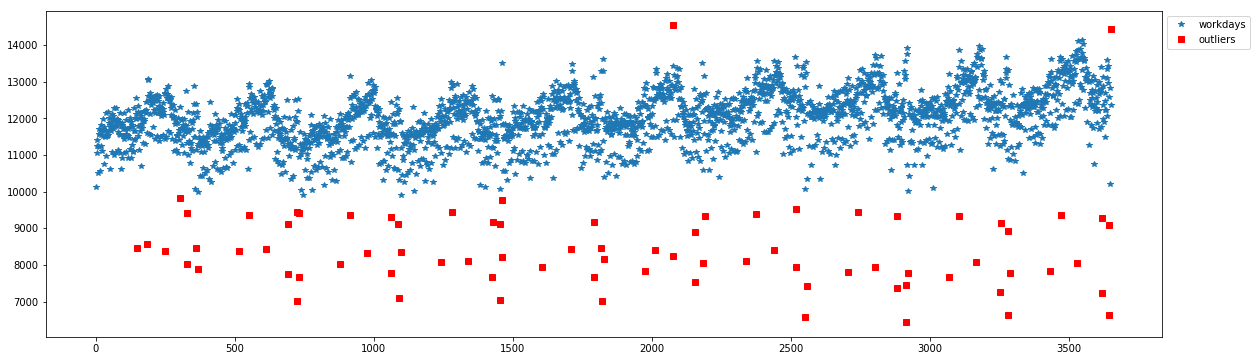

In [38]:
plt.plot(workdays.births,  marker = '*', linestyle = '')
plt.plot(idx,outl, marker = 's', linestyle = '', color='red')
plt.legend(['workdays', 'outliers'], bbox_to_anchor = (1,1))
plt.show()

In [39]:
def day_name(lst):
    nme = []
    for i in lst:
        nme.append(str(data.month[i]) + '.' + str(data.date_of_month[i]))
    return nme

Дни, соответствующие выбросам:

In [41]:
print(set(day_name(idx)))

{'11.29', '5.30', '11.26', '11.22', '7.5', '12.26', '9.2', '9.5', '11.24', '7.4', '12.24', '12.25', '5.26', '11.28', '5.29', '9.7', '10.31', '9.1', '12.31', '12.30', '9.4', '9.6', '5.31', '5.28', '5.27', '1.2', '9.3', '11.25', '11.27', '1.1', '11.23', '5.25', '9.9'}


Получается, что все выбросы соответствуют праздничным: Рождеству, Дню Труда (первая неделя сентября), Дню Поминовения (последний понедельник мая), Дню Независимости, Дню Благодарения и т.д., или предпраздничным дням

_____

Рассмотрим распределение рождений по числу месяца

In [42]:
date = pd.Series([median(dta(day=[i]).births) for i in days])

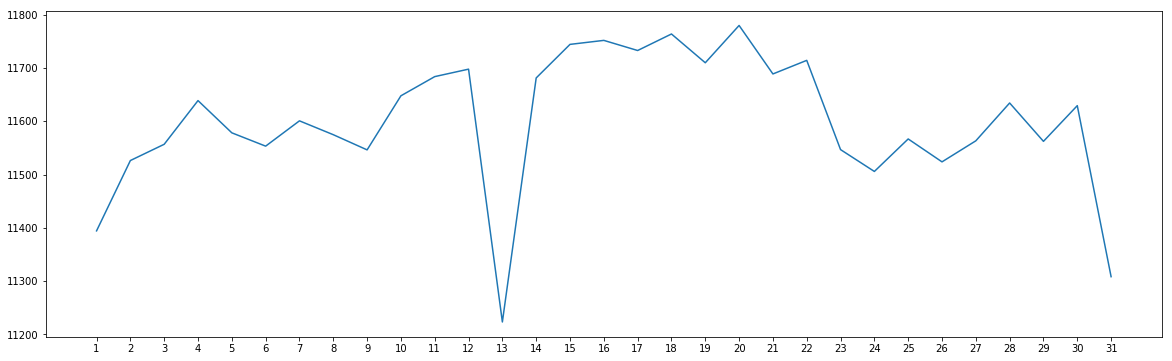

In [43]:
plt.plot(date)
xticks(range(0,31), range(1,32))
plt.show()

Низкую рождаемость в начале месяца можно связать с Днём Труда и Новым Годом, в конце месяца - с Рождеством, Днем Благодарения и также Новым Годом. 13 числа нет никаких официальных праздников в США. Проверим, связана ли низкая рождаемость 13 числа с суеверием о "пятнице 13го"

In [44]:
fri13 = dta(day = [13], weekday = [5])

In [45]:
fri13.describe()

,year,month,date_of_month,day_of_week,births
count,16.00000,16.000000,16.0,16.0,16.000000
mean,1998.43750,7.187500,13.0,5.0,11404.812500
std,2.82769,3.506542,0.0,0.0,564.646464
min,1994.00000,1.000000,13.0,5.0,10623.000000
25%,1996.00000,4.750000,13.0,5.0,11076.250000
50%,1998.00000,7.500000,13.0,5.0,11208.500000
75%,2001.00000,10.000000,13.0,5.0,11846.750000
max,2003.00000,12.000000,13.0,5.0,12786.000000


In [46]:
fri = dta(weekday = [5], day = np.delete(days,12))

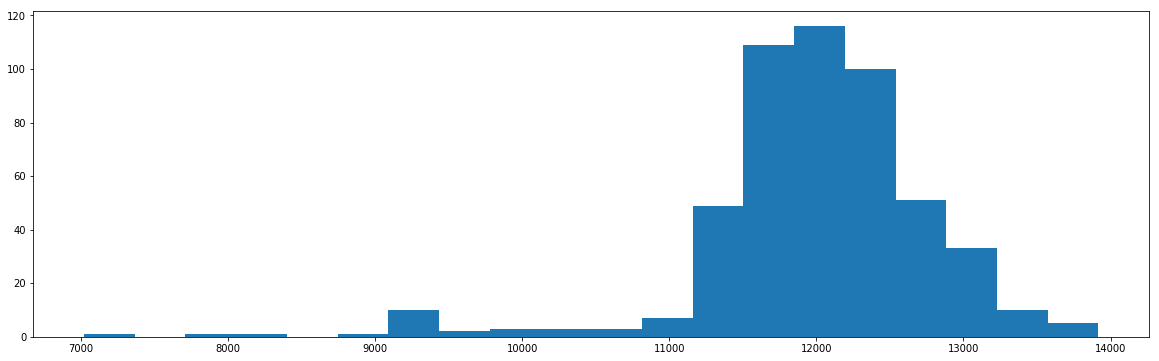

In [47]:
plt.hist(fri.births,20)
plt.show()

Избавимся от выбросов

In [48]:
frifltr = (fri.births > 10500)

Все выбросы соответствуют праздникам

In [49]:
fri[~frifltr]

,year,month,date_of_month,day_of_week,births
328,1994,11,25,5,9419
356,1994,12,23,5,10087
692,1995,11,24,5,9125
1063,1996,11,29,5,9302
1280,1997,7,4,5,9445
1399,1997,10,31,5,10142
1427,1997,11,28,5,9172
1455,1997,12,26,5,10075
1462,1998,1,2,5,9784
1644,1998,7,3,5,10371


In [50]:
fri_flt =  fri[frifltr]

In [51]:
fri_flt.describe()

,year,month,date_of_month,day_of_week,births
count,483.000000,483.000000,483.000000,483.0,483.000000
mean,1998.503106,6.354037,15.614907,5.0,12105.047619
std,2.887498,3.386714,8.788003,0.0,556.167991
min,1994.000000,1.000000,1.000000,5.0,10630.000000
25%,1996.000000,3.000000,8.000000,5.0,11675.000000
50%,1999.000000,6.000000,16.000000,5.0,12070.000000
75%,2001.000000,9.000000,23.000000,5.0,12453.500000
max,2003.000000,12.000000,31.000000,5.0,13918.000000


Оценим различия распределений рождаемости в пятницу 13 и рождаемости в любую другую пятницу

Проверим нормальность распределений критерием Шапиро-Уилка

In [53]:
shapiro(fri13.births) #не отвергаем гипотезу о нормальности

(0.9183422327041626, 0.15862557291984558)

In [54]:
shapiro(fri_flt.births) #отвергаем гипотезу о нормальности

(0.9890144467353821, 0.0010978251229971647)

Хотя критерий говорит о ненормальности распределения рождаемости в пятницу не 13го, можно считать данные условно нормальными, а значит применять t-критерий Стьюдента и проверять гипотезу о равенстве средних выборок

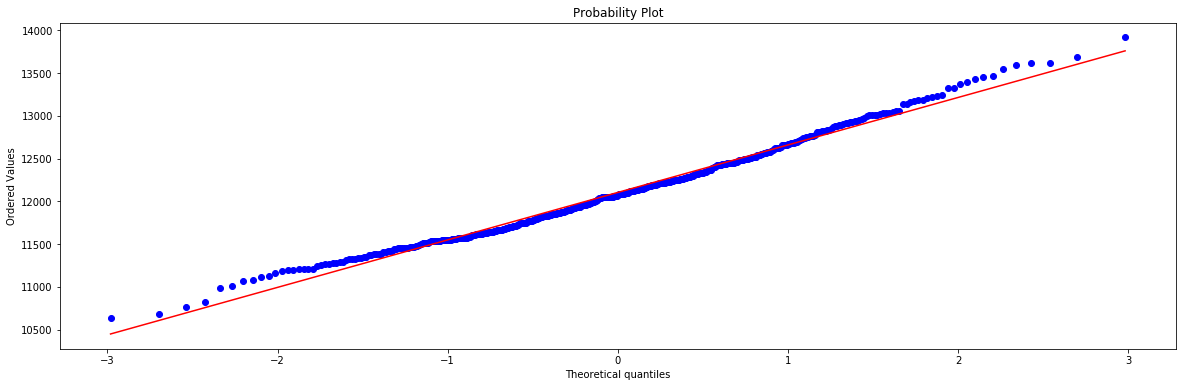

In [55]:
probplot(fri_flt.births, plot=plt, dist='norm')
plt.show()

Проверим равенство дисперсий с помощью критерия Флигнера-Киллина

In [56]:
fligner(fri13.births, fri_flt.births) #равенство дисперсий отвергаем

FlignerResult(statistic=0.07582470516823171, pvalue=0.7830374742297215)

Проверим равенство средних выборок

In [57]:
ttest_ind(fri13.births, fri_flt.births, equal_var = False) 

Ttest_indResult(statistic=-4.882679121423334, pvalue=0.00016653914752570446)

Гипотезу о равенстве средних отвергаем. Есть отличия в рождаемости в пятницу 13го и в любую другую пятницу